In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [2]:
# Load Excel file
file_path = r"C:\Users\User\OneDrive\Documents\YiJia\INTI\Sem 9\6006CEM Machine Learning and Related Applications\CW\AirQualityUCI.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
"""Column Info:
0 Date	(DD/MM/YYYY)
1 Time	(HH.MM.SS)
2 CO(GT)	 True hourly averaged concentration CO in mg/m^3  (reference analyzer)
3 PT08.S1(CO)	 PT08.S1 (tin oxide)  hourly averaged sensor response (nominally  CO targeted)
4 NMHC(GT)	 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5 C6H6(GT)	 True hourly averaged Benzene concentration  in microg/m^3 (reference analyzer)
6 PT08.S2(NMHC) 	 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7 NOx(GT)	 True hourly averaged NOx concentration  in ppb (reference analyzer)
8 PT08.S3(NOx)	 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
9 NO2(GT)	 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10 PT08.S4(NO2) 	 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11 PT08.S5(O3)	 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12 T	  Temperature in Â°C
13 RH	   Relative Humidity (%)
14 AH	   Absolute Humidity
"""

'Column Info:\n0 Date\t(DD/MM/YYYY)\n1 Time\t(HH.MM.SS)\n2 CO(GT)\t True hourly averaged concentration CO in mg/m^3  (reference analyzer)\n3 PT08.S1(CO)\t PT08.S1 (tin oxide)  hourly averaged sensor response (nominally  CO targeted)\n4 NMHC(GT)\t True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)\n5 C6H6(GT)\t True hourly averaged Benzene concentration  in microg/m^3 (reference analyzer)\n6 PT08.S2(NMHC) \t PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)\n7 NOx(GT)\t True hourly averaged NOx concentration  in ppb (reference analyzer)\n8 PT08.S3(NOx)\t PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) \n9 NO2(GT)\t True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)\n10 PT08.S4(NO2) \t PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)\n11 PT08.S5(O3)\t PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 tar

In [ ]:
# Data Cleaning

In [4]:
df.shape

(9357, 15)

In [5]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [6]:
# Convert 'Date' and 'Time' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

In [7]:
df.dtypes

Date             datetime64[ns]
Time             datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [8]:
# Check for null values in each column
null_values = df.isnull().sum()

# Display the result
print(null_values)


Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [9]:
# find duplicate rows
duplicate_rows = df.duplicated()

# print duplicate rows
print(duplicate_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
9352    False
9353    False
9354    False
9355    False
9356    False
Length: 9357, dtype: bool


In [10]:
# Summary statistics of numerical columns
df.describe()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [ ]:
"""
From the output above, -200 is very weird, so I'm going to remove the value.
NMHC(GT) min, median, q1, q3 all = -200, so this column might consider to drop. If not the model will not accurate at all.
"""

In [11]:
# in the data have a lot of -200. Removing those values and replacing with nan i.e null
df = df.replace(to_replace=-200, value=np.nan)

In [12]:
# Check for null values in each column (the -200 is replaced by null d)
null_values = df.isnull().sum()

# Display the result
print(null_values)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [13]:
# NMHC_GT has 8443 missing values so that the column will have to be dropped.
df.drop('NMHC(GT)', axis=1, inplace=True)

In [14]:
# Removing all rows with null values
df_cleaned = df.dropna()

# Check the shape of the cleaned dataset after removing rows with null values
df_cleaned.shape

(6941, 14)

In [15]:
df_cleaned.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [16]:
# Feature Engineering (Date, Time -> + Season, Hour_block)

In [17]:
# Add 'season' column based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return "Fail"

df_cleaned['season'] = df_cleaned['Date'].dt.month.apply(get_season)

C:\Users\User\AppData\Local\Temp\ipykernel_15580\188344935.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['season'] = df_cleaned['Date'].dt.month.apply(get_season)


In [18]:
# Add 'hour_block' column based on the time
def get_hour_block(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

df_cleaned['hour_block'] = df_cleaned['Time'].dt.hour.apply(get_hour_block)

C:\Users\User\AppData\Local\Temp\ipykernel_15580\2920238580.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['hour_block'] = df_cleaned['Time'].dt.hour.apply(get_hour_block)


In [19]:
df_cleaned.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'season', 'hour_block'],
      dtype='object')

In [ ]:
# EDA

In [20]:
df_cleaned.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000
mean,2.182467,1119.786222,10.554411,958.421925,250.656476,816.771659,113.858608,1452.528598,1057.631753,17.753280,48.880121,0.985573
std,1.441158,218.739106,7.465170,264.052415,208.603978,251.896825,47.464705,353.297883,406.505668,8.845398,17.432652,0.401097
min,0.100000,647.250000,0.181525,390.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.100000,956.250000,4.927071,759.750000,103.000000,642.250000,79.000000,1206.500000,759.500000,11.200000,35.325001,0.694123
50%,1.900000,1084.750000,8.788282,931.000000,186.000000,785.500000,110.000000,1457.000000,1006.250000,16.850000,49.175000,0.953910
75%,2.900000,1254.000000,14.579057,1135.250000,334.600000,946.500000,142.000000,1683.000000,1322.000000,23.724999,62.224999,1.251552
max,11.900000,2039.750000,63.741476,2214.000000,1479.000000,2682.750000,332.600000,2775.000000,2522.750000,44.600000,88.725000,2.180639


C:\Users\User\AppData\Local\Temp\ipykernel_15580\2262124082.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_cleaned.corr()


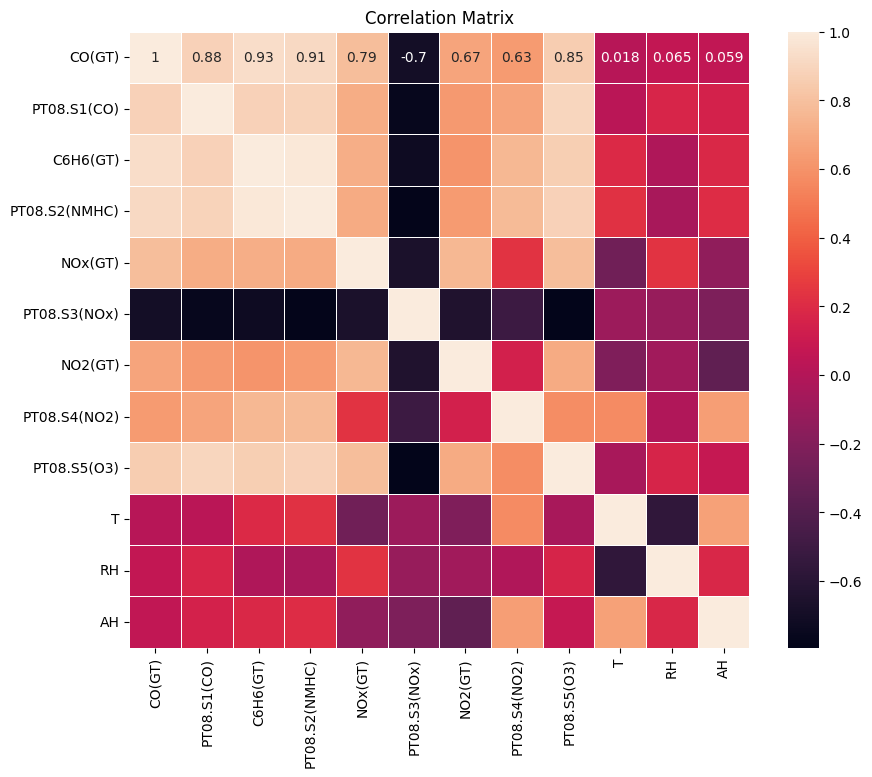

In [90]:
# Correlation matrix
corr_matrix = df_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


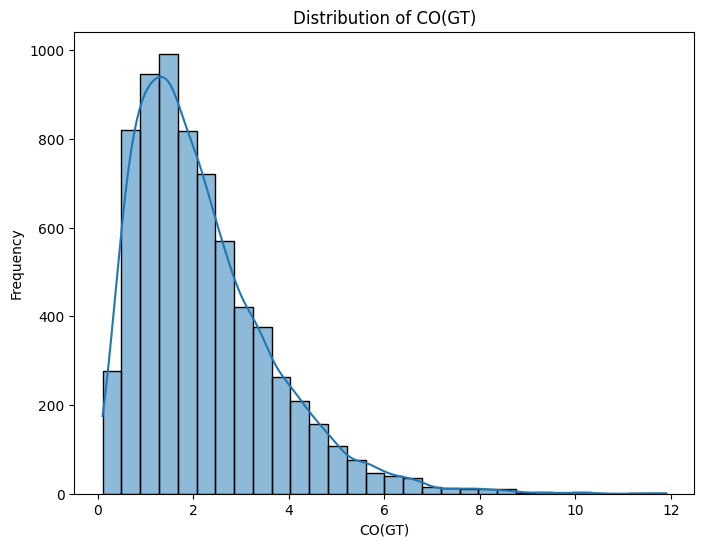

In [25]:
# Histogram for CO(GT) (target variable -this is what I going to predicted)
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned['CO(GT)'], bins=30, kde=True)
plt.title('Distribution of CO(GT)')
plt.xlabel('CO(GT)')
plt.ylabel('Frequency')
plt.show()

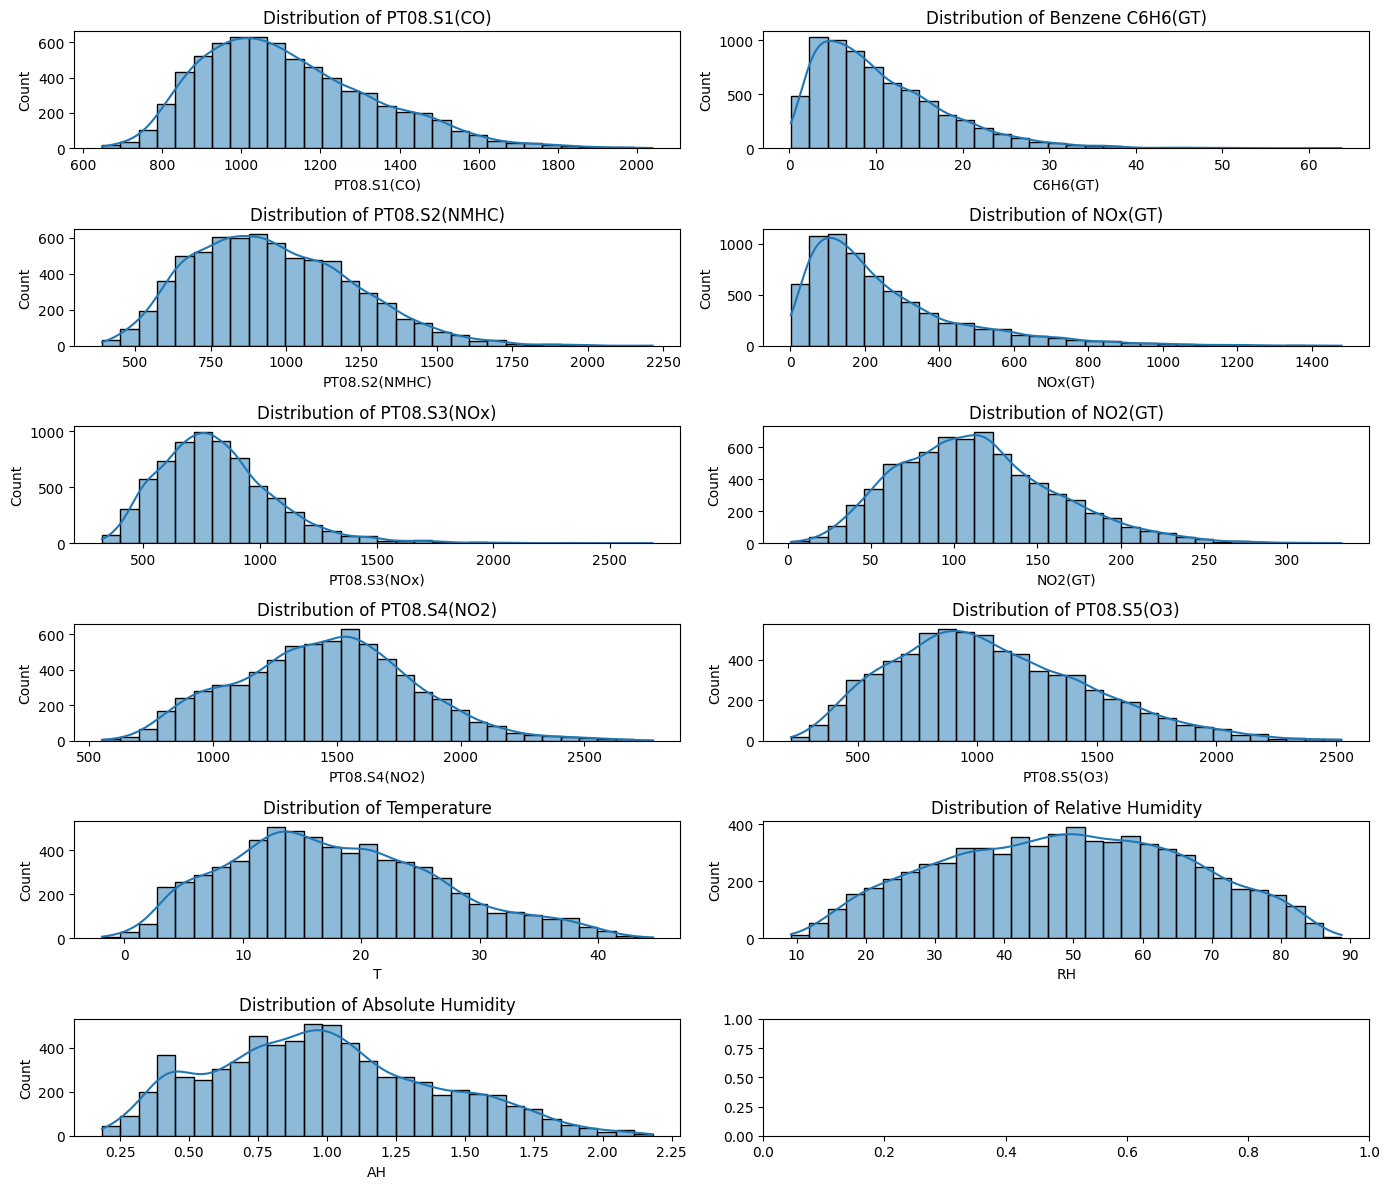

In [26]:
# Plot distributions for key features
fig, axes = plt.subplots(6, 2, figsize=(14,12))

sns.histplot(df_cleaned['PT08.S1(CO)'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of PT08.S1(CO)')

sns.histplot(df_cleaned['C6H6(GT)'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Benzene C6H6(GT)')

sns.histplot(df_cleaned['PT08.S2(NMHC)'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of PT08.S2(NMHC)')

sns.histplot(df_cleaned['NOx(GT)'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of NOx(GT)')

sns.histplot(df_cleaned['PT08.S3(NOx)'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of PT08.S3(NOx)')

sns.histplot(df_cleaned['NO2(GT)'], bins=30, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of NO2(GT)')

sns.histplot(df_cleaned['PT08.S4(NO2)'], bins=30, kde=True, ax=axes[3, 0])
axes[3, 0].set_title('Distribution of PT08.S4(NO2)')

sns.histplot(df_cleaned['PT08.S5(O3)'], bins=30, kde=True, ax=axes[3, 1])
axes[3, 1].set_title('Distribution of PT08.S5(O3)')

sns.histplot(df_cleaned['T'], bins=30, kde=True, ax=axes[4, 0])
axes[4, 0].set_title('Distribution of Temperature')

sns.histplot(df_cleaned['RH'], bins=30, kde=True, ax=axes[4, 1])
axes[4, 1].set_title('Distribution of Relative Humidity')

sns.histplot(df_cleaned['AH'], bins=30, kde=True, ax=axes[5, 0])
axes[5, 0].set_title('Distribution of Absolute Humidity')

plt.tight_layout()
plt.show()


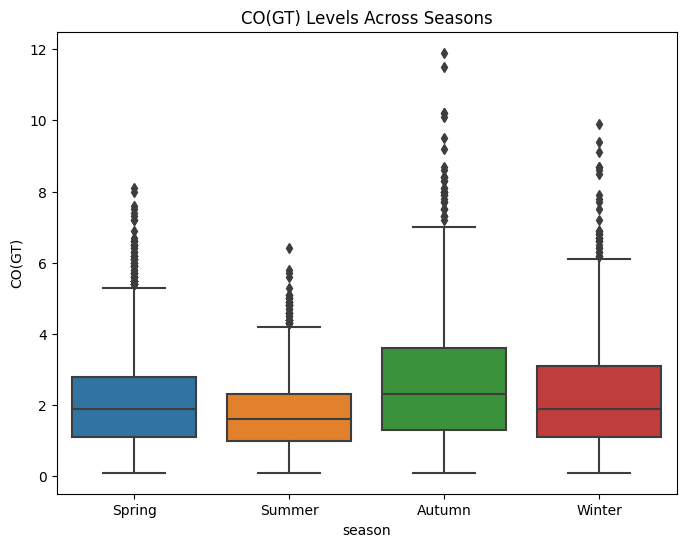

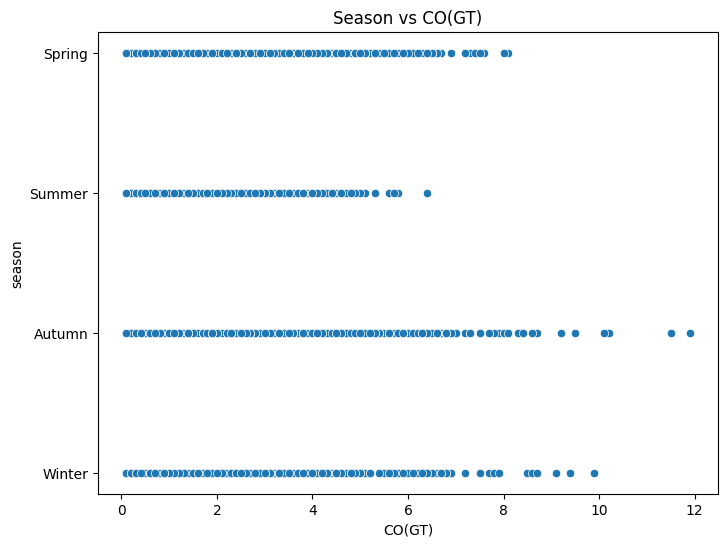

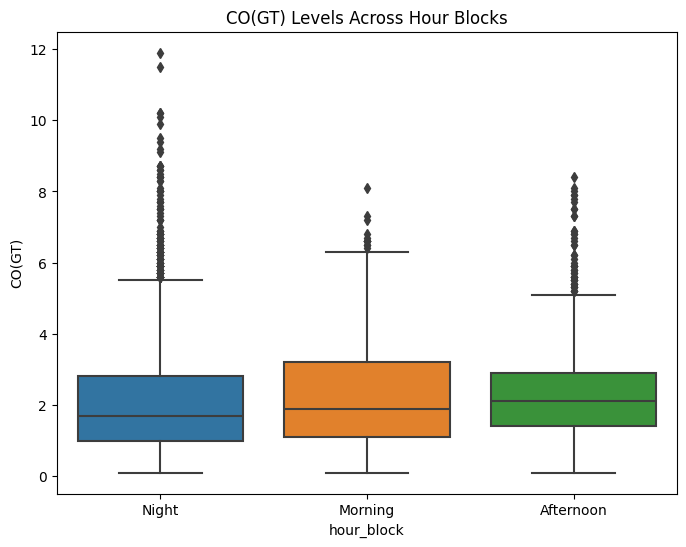

Text(0.5, 1.0, 'Hour Blocks vs CO(GT)')

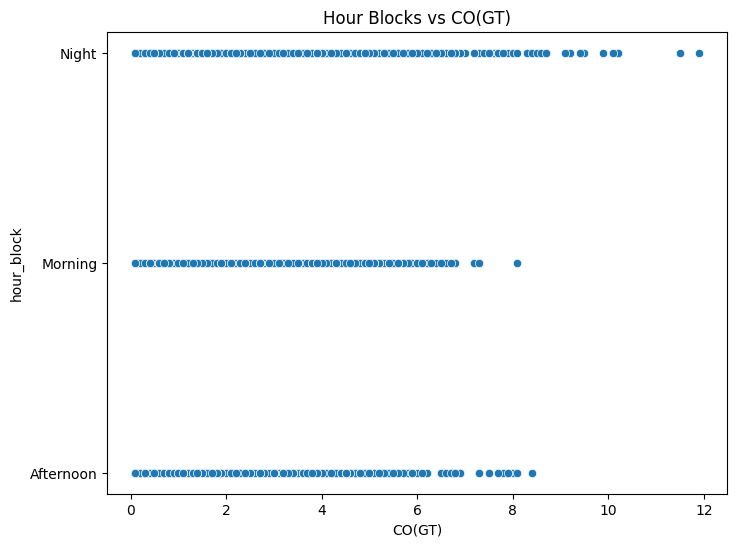

In [27]:
"""O(GT) vs Time-Related Features (Season and Hour Block)"""
# Boxplot for CO(GT) across seasons
plt.figure(figsize=(8,6))
sns.boxplot(x='season', y='CO(GT)', data=df_cleaned)
plt.title('CO(GT) Levels Across Seasons')
plt.show()

# Scatter plot of season vs CO
plt.figure(figsize=(8,6))
sns.scatterplot(y='season', x='CO(GT)', data=df_cleaned)
plt.title('Season vs CO(GT)')

# Boxplot for CO(GT) across hour blocks
plt.figure(figsize=(8,6))
sns.boxplot(x='hour_block', y='CO(GT)', data=df_cleaned)
plt.title('CO(GT) Levels Across Hour Blocks')
plt.show()

# Scatter plot of Hour Blocks vs co
plt.figure(figsize=(8,6))
sns.scatterplot(y=''hour_block'', x='CO(GT)', data=df_cleaned)
plt.title('Hour Blocks vs CO(GT)')

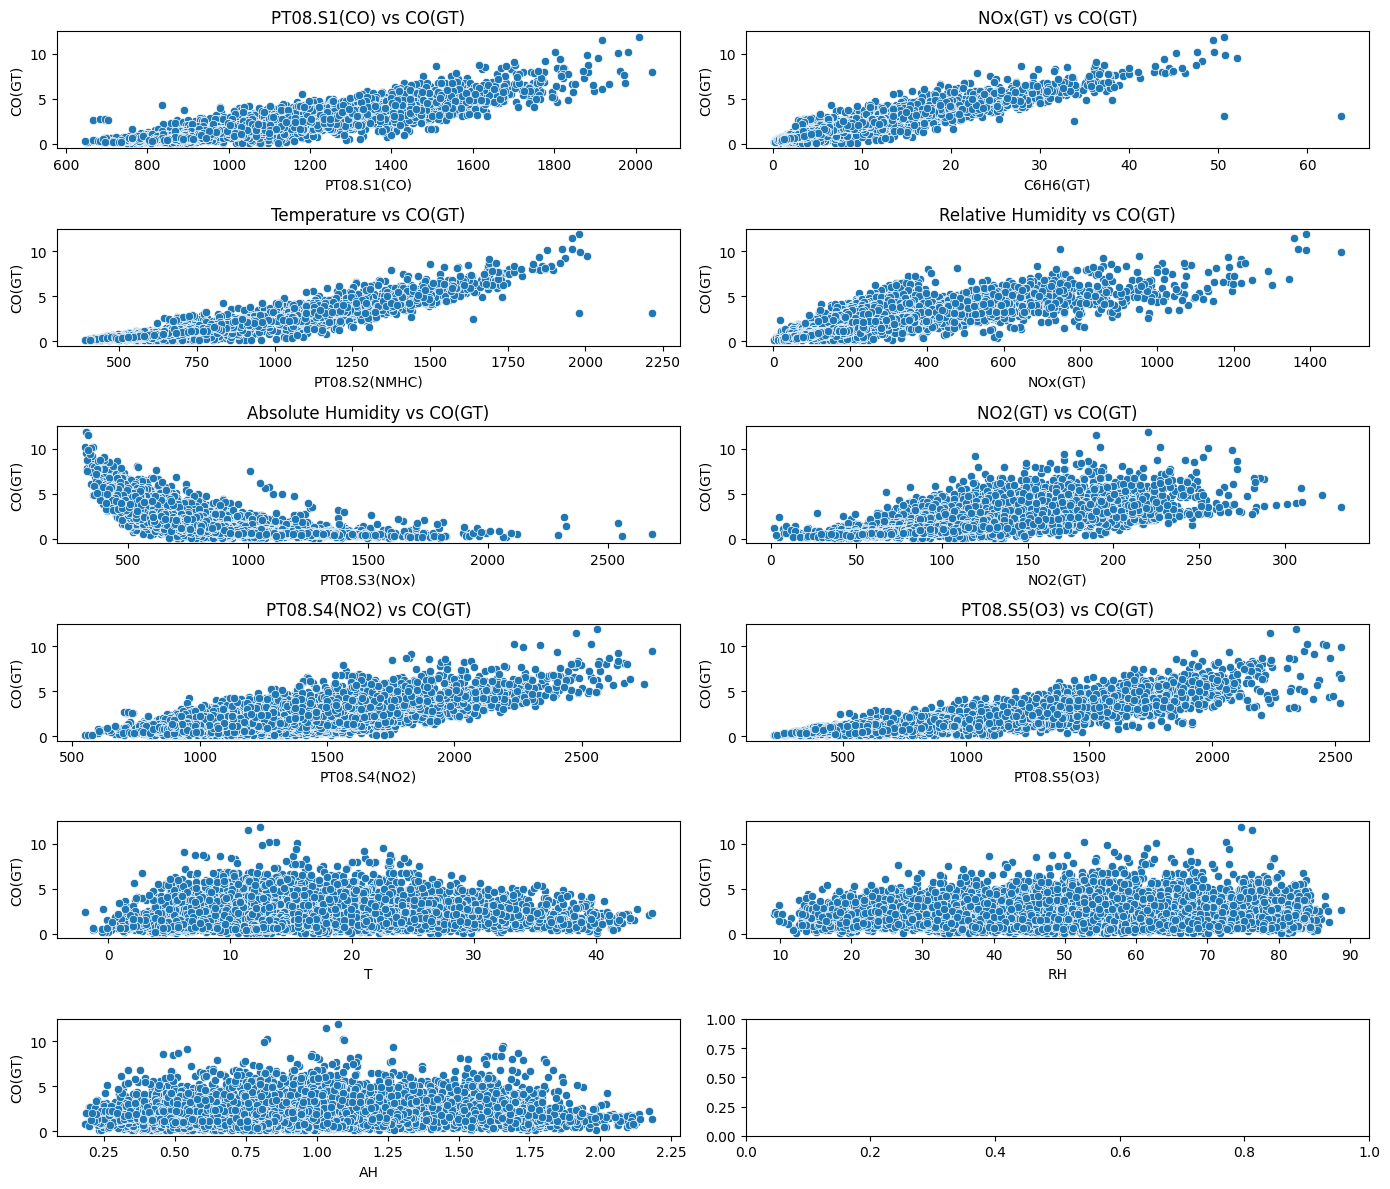

In [92]:
# Scatter plots for important features vs CO(GT)
fig, axes = plt.subplots(6, 2, figsize=(14,12))


sns.scatterplot(x='PT08.S1(CO)', y='CO(GT)', data=df_cleaned, ax=axes[0, 0])
axes[0, 0].set_title('PT08.S1(CO) vs CO(GT)')

sns.scatterplot(x='C6H6(GT)', y='CO(GT)', data=df_cleaned,ax=axes[0, 1])
axes[0, 1].set_title('C6H6(GT) vs CO(GT)')

sns.scatterplot(x='PT08.S2(NMHC)', y='CO(GT)', data=df_cleaned, ax=axes[1, 0])
axes[1, 0].set_title('PT08.S2(NMHC) vs CO(GT)')

sns.scatterplot(x='NOx(GT)', y='CO(GT)', data=df_cleaned, ax=axes[1, 1])
axes[0, 1].set_title('NOx(GT) vs CO(GT)')

sns.scatterplot(x='PT08.S3(NOx)', y='CO(GT)', data=df_cleaned, ax=axes[2, 0])
axes[2, 0].set_title('DPT08.S3(NOx) vs CO(GT)')

sns.scatterplot(x='NO2(GT)', y='CO(GT)', data=df_cleaned, ax=axes[2, 1])
axes[2, 1].set_title('NO2(GT) vs CO(GT)')

sns.scatterplot(x='PT08.S4(NO2)', y='CO(GT)', data=df_cleaned, ax=axes[3, 0])
axes[3, 0].set_title('PT08.S4(NO2) vs CO(GT)')

sns.scatterplot(x='PT08.S5(O3)', y='CO(GT)', data=df_cleaned, ax=axes[3, 1])
axes[3, 1].set_title('PT08.S5(O3) vs CO(GT)')



sns.scatterplot(x='T', y='CO(GT)', data=df_cleaned, ax=axes[4, 0])
axes[1, 0].set_title('Temperature vs CO(GT)')

sns.scatterplot(x='RH', y='CO(GT)', data=df_cleaned, ax=axes[4, 1])
axes[1, 1].set_title('Relative Humidity vs CO(GT)')

sns.scatterplot(x='AH', y='CO(GT)', data=df_cleaned, ax=axes[5, 0])
axes[2, 0].set_title('Absolute Humidity vs CO(GT)')

plt.tight_layout()
plt.show()


In [ ]:
# Features Scalling

In [64]:
# Separate the features and target
scaler = StandardScaler()
features = df_cleaned.drop(columns=['CO(GT)', 'Date', 'Time', 'T', 'AH', 'RH', 'season', 'hour_block'])  # Dropping target, 'Date', and 'Time' columns
target = df_cleaned['CO(GT)']  # 'CO(GT)' is the target variable

"""# Identify categorical and numerical features
categorical_features = ['season', 'hour_block']
numerical_features = features.drop(columns=categorical_features).columns.tolist()

# Create a column transformer to handle both scaling and one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])
"""
# Apply the column transformer to the features
# features_processed = preprocessor.fit_transform(features)

In [79]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [ ]:
# Model Implementation

In [80]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)


In [81]:
# Model evaluation

In [82]:
# Calculate the mean squared error (MSE) for both models
rf_mse = mean_squared_error(y_test, rf_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

print(f"Random Forest Mean Squared Error: {rf_mse:.2f}")
print(f"Linear Regression Mean Squared Error: {lr_mse:.2f}")

Random Forest Mean Squared Error: 0.15
Linear Regression Mean Squared Error: 0.17


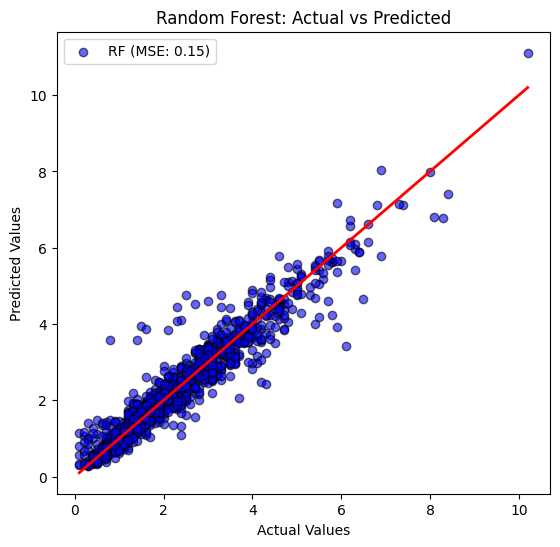

In [83]:
# Plot the actual vs predicted values for both models

# Random Forest plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions, color='blue', edgecolors='k', alpha=0.6, label=f"RF (MSE: {rf_mse:.2f})")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()

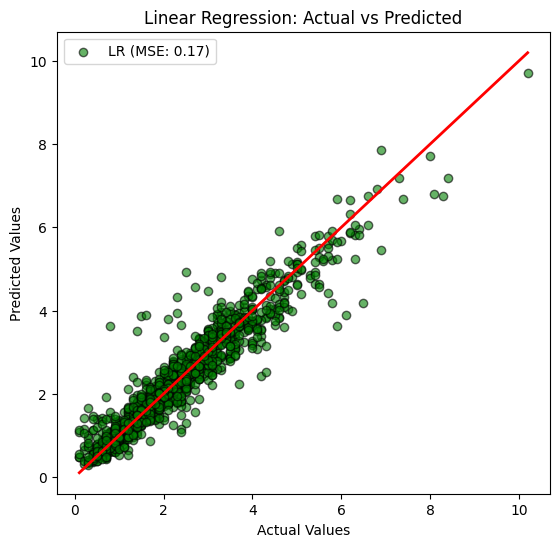

In [84]:
# Linear Regression plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_test, lr_predictions, color='green', edgecolors='k', alpha=0.6, label=f"LR (MSE: {lr_mse:.2f})")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

In [85]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R² Score: {r2:.2f}\n")

# Evaluate Random Forest
evaluate_model(y_test, rf_predictions, 'Random Forest')

# Evaluate Linear Regression
evaluate_model(y_test, lr_predictions, 'Linear Regression')


Random Forest Performance:
Mean Squared Error: 0.15
Mean Absolute Error: 0.25
R² Score: 0.92

Linear Regression Performance:
Mean Squared Error: 0.17
Mean Absolute Error: 0.27
R² Score: 0.91



In [71]:
# Example of entering new data for prediction
new_data = [[125, 3.5, 150, 24, 200, 0.75, 50, 7, 12, 80, 0.9, 15]]  # Example input (Replace with actual values)

new_prediction_rf = rf_model.predict(new_data)
new_prediction_lr = lr_model.predict(new_data)

print(f"Random Forest Prediction for new data: {new_prediction_rf}")
print(f"Linear Regression Prediction for new data: {new_prediction_lr}")

ValueError: X has 12 features, but RandomForestRegressor is expecting 15 features as input.

In [74]:
print("Feature columns:")
print(features.columns)

Feature columns:
Index(['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
       'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'],
      dtype='object')


In [75]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (5552, 15)
X_test shape: (1389, 15)


In [76]:
print("First few rows of scaled X_train:")
X_train[:5]


First few rows of scaled X_train:


array([[-0.40707232, -0.46330303, -0.36897577, -0.73664724,  0.34234077,
        -0.41841699,  0.22920385, -0.57354317,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-1.38319125, -0.93185519, -1.02419592, -0.95717666,  1.91551879,
        -1.13479033, -0.05103313, -1.3435756 ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [-1.56949966, -1.15288868, -1.43228824, -0.72226489,  1.77259284,
        -1.17692994, -1.38711248, -1.45797339,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [-1.05172229, -1.11529352, -1.35464655, -0.71938842,  0.93786557,
        -0.67336162, -1.83931306, -1.64125587,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ],
       [-0.02188254,  0.13951376,  0.29192548,  0.18382337, -0.66707377,
        -0.31306797, -0.20176666,  0.34963469, 

In [77]:
# Save the feature names before scaling
feature_names = features.columns

In [78]:
# Feature importances for Random Forest
importances = rf_model.feature_importances_

# Ensure the length matches
print(f"Length of feature names: {len(feature_names)}")
print(f"Length of feature importances: {len(importances)}")

# Create the DataFrame
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame based on importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Feature importances for Random Forest:")
print(feature_importances)


Length of feature names: 8
Length of feature importances: 15


ValueError: All arrays must be of the same length

In [56]:
coefficients = lr_model.coef_

# Display coefficients alongside feature names
lr_coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': coefficients})
lr_coefficients = lr_coefficients.sort_values(by='Coefficient', ascending=False)

print("Coefficients for Linear Regression:")
print(lr_coefficients)


ValueError: All arrays must be of the same length